In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as patches

# Notes on 
[Р.В. Шамин. Лекция 4. Сети Кохонена в задачах кластеризации экономических данных](http://www.mathnet.ru/php/seminars.phtml?option_lang=rus&presentid=19582)

- [x] Сети Кохонена в задачах кластеризации экономических данных
- [x] Формулировка задачи
- [x] Кластеризация данных  
- [x] Сеть Кохонена
- [x] Самоорганизующаяся карта Кохонена
- [x] Ссылки
- [x] Пример

## Сети Кохонена в задачах кластеризации экономических данных.
Методы анализа на основе сетей Кохонена и самоорганизующихся карт Кохонена.

Опустим формальное определение информации, в нашем случае будет достаточно ввести следующие .
- неформальная часть информации участвующая в принятии решения.
- формальная информация, которую мы будем называть данными.

## Формулировка задачи
Наша цель, сформулировать задачу для работы с формальной части информации.

Когда мы говорим о визуализации данных и его эмоциональном влиянии на принятие решений, задача оказываеться не тривиальной из-за многочисленных факторов, в качестве яркого примера можно привести так называемый [Lie Factor](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=00002o) предложенный Эдвардом Таффти.
![lie-factor](lie-factor.jpg)

Графическое представление информации, не гарантирует, то что информация полностью используеться без добавления эмоционального окраса.

Задачей будет являться, представление данных в таком виде, чтобы их можно было использовать для принятия Истиного решения. 

В задачах мы обычно будем иметь дело с данными в виде следующих таблиц:

Предприятие | Характеристика 1 | Характеристика 2 | Характеристика 3
--- | --- | --- | ---
ID1 | 1050 | 4,5 | Да
ID2 | 2344 | 6 | Нет

или финансовые данные в виде временных рядов,

Asset | 01.01.00 | 02.01.00 | 03.01.00
--- | --- | --- | ---
AAPL | 1050,5 | 1101,1 | 1245,67
SPY | 2344,45 | 2345,17 | 2330,5

Нас интересует не формальный метод оптимизации, а действия по приведению данных в "полезный" для ЛПР вид.
Обычно, методы классической статистики избыточны на подобных данных, но методы машинного обучения дают некоторые полезные инструменты, для более эффективного их применения.

## Кластеризация данных

Нейронная сеть - метод опроксимации любой функции, основным недостатком данного метода в данной задачи, являеться важность большого обучающих примеров.

Когда мы говорим о "закупочной аналитике" где мы имеем большую выборку, то этот метот действует отлично.

В большинстве реальных экономических задачах, у нас обычно нету такой возможности.

Допустим матрица существование матрицы $U$ с наобором значений.

$d:U \to \{ 1,2,...,K \}^\mbox{К - количество классов}$

Если Размерность $U$ в пределах 20 единиц, обычно можно сделать адекватный вывод и увидеть классы без применения дополнительных методов.

Когда мы говорим о больших размерностях, то уместно использовать Сети Кохонена, как метод машинного обучения без учителя.

## Сеть Кохонена
    
Определение из Википедии - [Сеть Кохонена](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C_%D0%9A%D0%BE%D1%85%D0%BE%D0%BD%D0%B5%D0%BD%D0%B0)

1. Допустим что $\underset{(M \times N)}{U}$
2. $W_k, k=1,...,K$
3. $W_k \in \mathbb{R}^M$
5. Если столбец не вырожденный, то есть имеет более 1 значения, Нормируем данные по столбцам $N$
6. В цикле
    * Берем случайным образом элемент из $U$ который являеться $N$ мерным вектором 
    * Находим ближайщий из $W_k$ к нашему случайному элементу.
7. В итоге веса в нейроне настроятся таким образом что они будут интуитивно подтверждать правильность параметра $K$
8. В итоге сравнивая каждый элемент с полученным нейроном, может определить расстояние до него.

Важный момент это вычисление количества классов $K$ содержащихся в нашей выборке

Иногда количество классов, интуитивно понятно. Но чаще это не так.

Применяеться следующий эмпирический прием:
1. Пусть $K = 2$, разбиение на классы дает [25, 75]
2. Зауская алгоритм ~10 раз и вы видите что результат ~ одинаковый(+/-10%) 
3. Значит разбиение на 2 класса имеет смысл
4. Для $K = 3$, например [7, 23, 70]
5. Повторяем 2. - 3.
6. Для $K = 4$ , например [0, 7, 23, 70]
7. Значит на 4 класса данные не разбиваються. Работа алгоритма приводит к вырождению элементов 4 класса.
8. Если в результате кластеризации получаеться класс с одним элементом, то это тоже важный результат для пересмотра формулировки задачи или формирования выборки.

**Важный постулат: Все методы машинного обучения в реальных задачах экономики, носят рекомендательный характер**


## Иерархические структуры 

Очень часто результат кластеризации дает иерархическую структуру.

Сеть кохонена, на выходе дает информацию:
- о количестве классов, 
- для каждого класса какие элементы к нему относятся, 
- характерное значение каждого класса.

Что позволяет в отличие классической нейронной сети со скрытыми слоями, *интуитивно* понять результат работы алгоритма.

```text
                +---+
                |100|
     +------------+-------------+
     |            |             |
   +-v+          +v-+          +v-+
   |50|          |40|          |10|
  +----+      +----+-----+     +--+
  |    |      |    |     |
  |    |      |    |     |
+-v+  +v-+  +-v+  +v-+  +v-+
|25|  |25|  |20|  |15|  |5 |
+--+  +--+  +--+  +--+  +--+

```

Что позволяет разбиению на классы дать *содержательную* трактовку.

## Самоорганизующаяся карта Кохонена

Определение из Википедии - [Самоорганизующаяся карта Кохонена](https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D0%BC%D0%BE%D0%BE%D1%80%D0%B3%D0%B0%D0%BD%D0%B8%D0%B7%D1%83%D1%8E%D1%89%D0%B0%D1%8F%D1%81%D1%8F_%D0%BA%D0%B0%D1%80%D1%82%D0%B0_%D0%9A%D0%BE%D1%85%D0%BE%D0%BD%D0%B5%D0%BD%D0%B0)

Решает ту же задачу что и сама сеть, но главной особенностью являеться наглядное графическое представление полученной информации.

<BarContainer object of 10 artists>

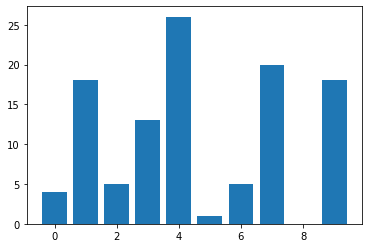

In [38]:
# Для одномерных данных, имеем следующее представление:
plt.bar(np.arange(10), np.random.randint(30, size=10))

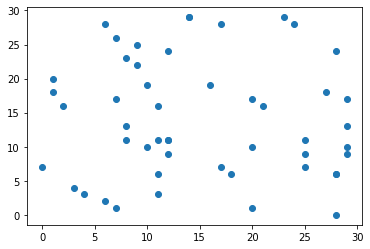

In [52]:
# Для двухмерных данных:
mtr = np.random.randint(30, size=(50, 2))
plt.scatter(mtr[:,0], mtr[:,1])

Уже начиная с 3 параметров, интуитивная визуализация представляет собой проблему

Карта Кохонена решает задачу интуитивной визуализации этих данных

In [55]:
raw_data = np.random.randint(0, 255, (3, 100))

In [56]:
network_dimensions = np.array([5, 5])
n_iterations = 10000
init_learning_rate = 0.01

normalise_data = True
normalise_by_column = False

In [57]:
m = raw_data.shape[0]
n = raw_data.shape[1]

# initial neighbourhood radius
init_radius = max(network_dimensions[0], network_dimensions[1]) / 2
# radius decay parameter
time_constant = n_iterations / np.log(init_radius)

data = raw_data
if normalise_data:
    if normalise_by_column:
        col_maxes = raw_data.max(axis=0)
        data = raw_data / col_maxes[np.newaxis, :]
    else:
        data = raw_data / data.max()

In [58]:
net = np.random.random((network_dimensions[0], network_dimensions[1], m))

In [59]:
def find_bmu(t, net, m):
    """
        Find the best matching unit for a given vector, t
        Returns: bmu and bmu_idx is the index of this vector in the SOM
    """
    bmu_idx = np.array([0, 0])
    min_dist = np.iinfo(np.int).max
    
    # calculate the distance between each neuron and the input
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            sq_dist = np.sum((w - t) ** 2)
            sq_dist = np.sqrt(sq_dist)
            if sq_dist < min_dist:
                min_dist = sq_dist # dist
                bmu_idx = np.array([x, y]) # id
    
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    return (bmu, bmu_idx)

In [60]:
def decay_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)

def decay_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)

def calculate_influence(distance, radius):
    return np.exp(-distance / (2* (radius**2)))

In [61]:
for i in range(n_iterations):
    # select a training example at random
    t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))
    
    # find its Best Matching Unit
    bmu, bmu_idx = find_bmu(t, net, m)
    
    # decay the SOM parameters
    r = decay_radius(init_radius, i, time_constant)
    l = decay_learning_rate(init_learning_rate, i, n_iterations)
    
    # update weight vector to move closer to input
    # and move its neighbours in 2-D vector space closer
    
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
            w_dist = np.sqrt(w_dist)
            
            if w_dist <= r:
                # calculate the degree of influence (based on the 2-D distance)
                influence = calculate_influence(w_dist, r)
                
                # new w = old w + (learning rate * influence * delta)
                # where delta = input vector (t) - old w
                new_w = w + (l * influence * (t - w))
                net[x, y, :] = new_w.reshape(1, 3)

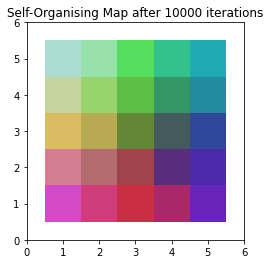

In [62]:
fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.shape[0]+1))
ax.set_ylim((0, net.shape[1]+1))
ax.set_title('Self-Organising Map after %d iterations' % n_iterations)

# plot
for x in range(1, net.shape[0] + 1):
    for y in range(1, net.shape[1] + 1):
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
plt.show()

## Ссылки

Reading material:

[Applications of the growing self-organizing map, Th. Villmann, H.-U. Bauer, May 1998](https://en.wikipedia.org/wiki/Self-organizing_map)

Application:

http://blog.yhat.com/posts/self-organizing-maps-2.html  
http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/som.html  
http://www.ai-junkie.com/ann/som/som1.html

Implementations:

Please find code here.
https://github.com/abhinavralhan/kohonen-maps

## Пример

In [64]:
import copy

XA = [[5.4, 4020, 2060, 57, 37],
     [8.9, 4810, 2223, 140, 40],
     [19.5, 5380, 2910, 285, 60],
     [25, 5890, 2880, 300, 40],
     [44.8, 6870, 3270, 700, 55],
     [56, 6316, 3705, 700, 44],
     [68, 7380, 3755, 700, 38],
     [13.8, 5200, 2470, 300, 60],
     [9.2, 4285, 2348, 140, 42],
     [30, 5920, 3000, 500, 54],
     [31.8, 6070, 3180, 500, 60],
     [47.5, 6675, 3320, 600, 34],
     [44.2, 6770, 3070, 520, 37],
     [46, 6770, 3070, 520, 37],
     [49, 6900, 3150, 520, 40]]

X = copy.deepcopy(XA)

M = len(X)

N = len(X[0])

K = 2

T = 10

la = 0.3

dla = 0.05

Max = []
Min = []

def rho(x, y):
    res = 0

    for n in range(len(x)):
        res += abs(x[n] - y[n])

    return res

def Near(x, W):
    res = 0

    min = rho(x, W[0])

    for k in range(len(W)):
        if rho(x, W[k]) < min:
            min = rho(x, W[k])
            res = k

    return res

for n in range(N):
    Max.append(X[0][n])
    Min.append(X[0][n])

    for m in range(M):
        if X[m][n] > Max[n]:
            Max[n] = X[m][n]
        if X[m][n] < Min[n]:
            Min[n] = X[m][n]


An = []
Bn = []

for n in range(N):
    an = 1 / (Max[n] - Min[n])
    bn = -Min[n] / (Max[n] - Min[n])
    An.append(an)
    Bn.append(bn)

    for m in range(M):
        X[m][n] = an * X[m][n] + bn

W = []
for k in range(K):
    w = []
    for n in range(N):
        w.append(np.random.uniform(0.1, 0.3))
    W.append(w)

while la > 0:
    for t in range(T):
        for m in range(M):
            k = Near(X[m], W)
            for n in range(N):
                W[k][n] += la * (X[m][n] - W[k][n])

    la -= dla

for m in range(M):
    k = Near(X[m], W)

    print("Класс = {0}\t{1}".format(k, XA[m]))

Класс = 0	[5.4, 4020, 2060, 57, 37]
Класс = 0	[8.9, 4810, 2223, 140, 40]
Класс = 0	[19.5, 5380, 2910, 285, 60]
Класс = 1	[25, 5890, 2880, 300, 40]
Класс = 1	[44.8, 6870, 3270, 700, 55]
Класс = 1	[56, 6316, 3705, 700, 44]
Класс = 1	[68, 7380, 3755, 700, 38]
Класс = 0	[13.8, 5200, 2470, 300, 60]
Класс = 0	[9.2, 4285, 2348, 140, 42]
Класс = 1	[30, 5920, 3000, 500, 54]
Класс = 1	[31.8, 6070, 3180, 500, 60]
Класс = 1	[47.5, 6675, 3320, 600, 34]
Класс = 1	[44.2, 6770, 3070, 520, 37]
Класс = 1	[46, 6770, 3070, 520, 37]
Класс = 1	[49, 6900, 3150, 520, 40]
